# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    teo_call, teo_put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("teo_call: ", teo_call)
    print("teo_put: ", teo_put)

 == BLACK-SCHOLES ==
teo_call:  14.975790778311286
teo_put:  5.4595325819072364


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
path="DATA/"

filename="call_fulltime.txt"
call_f, call_f_err = np.loadtxt(path+filename, delimiter='\t', unpack=True)

filename="call_discrete.txt"
call_d, call_d_err = np.loadtxt(path+filename, delimiter='\t', unpack=True)

filename="put_fulltime.txt"
put_f, put_f_err = np.loadtxt(path+filename, delimiter='\t', unpack=True)

filename="put_discrete.txt"
put_d, put_d_err = np.loadtxt(path+filename, delimiter='\t', unpack=True)



In [4]:
def plot_errorbar(ax, x, theo,  y, err, option, timev ) : 
    #
    #ax.plot(x, theo, label="analitical prediction")
    ax.errorbar(x, y, yerr=err, label=f"${timev}$ time step(s) to T")#, 
    ax.set_xlabel('N throws')
    #ax.set_xscale("log")
    ax.set_ylabel(f"{option} prize estimation")
    ax.set_title(f"Monte carlo estimation of Europian {option}-option prize")
    ax.grid(True)
    ax.legend()

In [5]:
Nblocks=len(call_f)
Nthrows=10000
L=int(Nthrows/Nblocks)

x = np.arange(Nblocks)
x+=1
x*=L


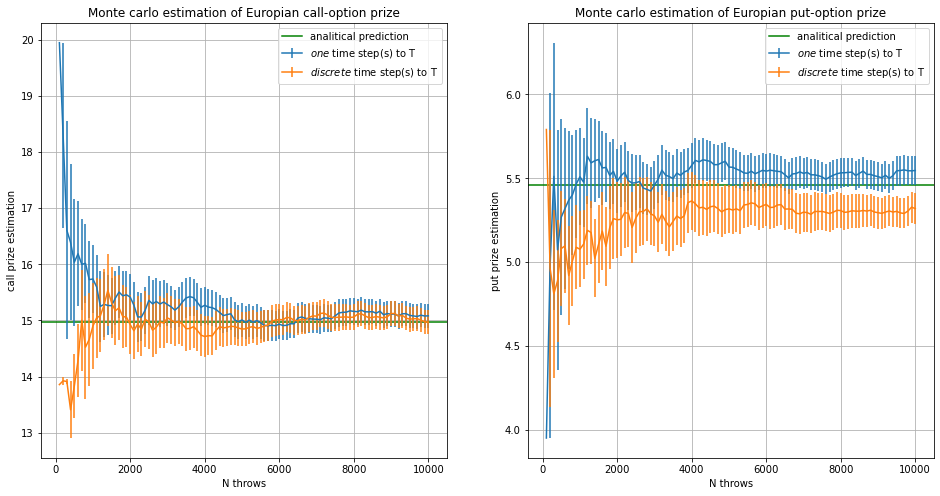

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.axhline(y=teo_call, color='g', linestyle='-', label="analitical prediction")
plot_errorbar(ax1, x, teo_call, call_f, call_f_err, "call", "one")
plot_errorbar(ax1, x, teo_call, call_d, call_d_err, "call", "discrete")

ax2.axhline(y=teo_put, color='g', linestyle='-', label="analitical prediction")
plot_errorbar(ax2, x, teo_put, put_f, put_f_err, "put", "one")
plot_errorbar(ax2, x, teo_put, put_d, put_d_err, "put", "discrete")

As we can se both methods are equivalent for the prediction of the put and call prize option. Our data are compatible with the theoretical solution.